In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import os
import glob
import skimage
from skimage import data
from skimage.feature import register_translation
from skimage.feature.register_translation import _upsampled_dft
from scipy.ndimage import fourier_shift
import re



In [2]:
mpl.rcParams['figure.figsize'] = (6, 4)
mpl.rcParams['figure.dpi'] = 150

First we find the folder that holds the images and create a file list based on the files in that folder.

In [3]:
DATA_FOLDER = os.path.join('C:\\', 'Users', 'gt8mar', 'patientg')
print(DATA_FOLDER)

# DATA_FOLDER = os.path.join('C:\\', 'Users', 'gt8ma','Documents','Quake','Bluud', 'patientg')
# print(DATA_FOLDER)

C:\Users\gt8mar\patientg


In [1]:
%cd C:\Users\gt8mar\patientg
# !dir

C:\Users\gt8mar\patientg


These are the different video file collection in the folder patientg

174159417
174230539
174245878


In [5]:
%cd C:\Users\gt8mar\Documents\Marcus\Leuk

C:\Users\gt8mar\Documents\Marcus\Leuk


In [6]:
file_list = glob.glob(os.path.join(DATA_FOLDER, 'Basler_acA1300-200um__23253950__*.tiff'))
#print(file_list)

In [7]:
file_list[5]

'C:\\Users\\gt8mar\\patientg\\Basler_acA1300-200um__23253950__20200219_174159417_102.tiff'

Next we create a list of numbers (num) that correspond to the file names using the regular expression package. We do this because the files will otherwise sort alphabetically, not numerically. We plan to make a dictionary instead. 

In [8]:
findall = re.compile('Basler_acA1300-200um__23253950__(?P<date>[\d]+)_(?P<coll>[\d]+)_(?P<num>[\d]+).tiff')


In [9]:
print(findall.search(file_list[5])['num'])
print(findall.search(file_list[5])['date'])
print(findall.search(file_list[5])['coll'])


102
20200219
174159417


Here we make a dictionary that has values of our numpy image arrays with keys of the file number. I will later add the date and run number to the dictionary. 

In [325]:
import pandas as pd

date = []
coll = []
num = []
indexcall = []


for i in range(len(file_list)):
    #print(file_list[i])
    
    date.append(findall.search(file_list[i])['date'])
    coll.append(findall.search(file_list[i])['coll'])
    num.append(findall.search(file_list[i])['num'])
    indexcall.append(file_list[i])
    
    
    
df = pd.DataFrame(
        {"date" : date,
         "coll" : coll,
         "num" : num}, 
        index = indexcall)

date1 = df.groupby(by =
            ["date",
             "coll"])

my_imgs = {}
whale = {}

for group, data in date1:
    print(group)
    #print(data)
    for file in data.index:
        #print(file, data.loc[file, "num"])
        my_imgs[data.loc[file,"num"]] = skimage.external.tifffile.imread(file) 
        #read file
        #add to dict
    whale[group] = my_imgs    
#     print(data.index)
#     print(data.num)
    
#     my_images[int(num)] = skimage.external.tifffile.imread(file_list[i])

('20200219', '174159417')
('20200219', '174230539')
('20200219', '174245878')


In [2]:
# print(my_imgs)
# print(whale)

In [327]:
date1.head(100)

,date,coll,num
C:\Users\gt8mar\patientg\Basler_acA1300-200um__23253950__20200219_174159417_1.tiff,20200219,174159417,1
C:\Users\gt8mar\patientg\Basler_acA1300-200um__23253950__20200219_174159417_10.tiff,20200219,174159417,10
C:\Users\gt8mar\patientg\Basler_acA1300-200um__23253950__20200219_174159417_100.tiff,20200219,174159417,100
C:\Users\gt8mar\patientg\Basler_acA1300-200um__23253950__20200219_174159417_1000.tiff,20200219,174159417,1000
C:\Users\gt8mar\patientg\Basler_acA1300-200um__23253950__20200219_174159417_101.tiff,20200219,174159417,101
...,...,...,...
C:\Users\gt8mar\patientg\Basler_acA1300-200um__23253950__20200219_174245878_184.tiff,20200219,174245878,184
C:\Users\gt8mar\patientg\Basler_acA1300-200um__23253950__20200219_174245878_185.tiff,20200219,174245878,185
C:\Users\gt8mar\patientg\Basler_acA1300-200um__23253950__20200219_174245878_186.tiff,20200219,174245878,186
C:\Users\gt8mar\patientg\Basler_acA1300-200um__23253950__20200219_174245878_187.tiff,20200219,174245878,187


In [328]:
df.tail(10)

,date,coll,num
C:\Users\gt8mar\patientg\Basler_acA1300-200um__23253950__20200219_174245878_990.tiff,20200219,174245878,990
C:\Users\gt8mar\patientg\Basler_acA1300-200um__23253950__20200219_174245878_991.tiff,20200219,174245878,991
C:\Users\gt8mar\patientg\Basler_acA1300-200um__23253950__20200219_174245878_992.tiff,20200219,174245878,992
C:\Users\gt8mar\patientg\Basler_acA1300-200um__23253950__20200219_174245878_993.tiff,20200219,174245878,993
C:\Users\gt8mar\patientg\Basler_acA1300-200um__23253950__20200219_174245878_994.tiff,20200219,174245878,994
C:\Users\gt8mar\patientg\Basler_acA1300-200um__23253950__20200219_174245878_995.tiff,20200219,174245878,995
C:\Users\gt8mar\patientg\Basler_acA1300-200um__23253950__20200219_174245878_996.tiff,20200219,174245878,996
C:\Users\gt8mar\patientg\Basler_acA1300-200um__23253950__20200219_174245878_997.tiff,20200219,174245878,997
C:\Users\gt8mar\patientg\Basler_acA1300-200um__23253950__20200219_174245878_998.tiff,20200219,174245878,998
C:\Users\gt8mar\patientg\Basler_acA1300-200um__23253950__20200219_174245878_999.tiff,20200219,174245878,999


In [10]:
my_images = {}

for i in range(len(file_list)):
    #print(file_list[i])
    num = findall.search(file_list[i])['num']
    my_images[int(num)] = skimage.external.tifffile.imread(file_list[i])
    

In [11]:
sorted_myimages = sorted(my_images)
#print(sorted_myimages)
# print(max(sorted_myimages))



In [12]:
#print(my_images)

Now we have a dictionary where we can call our images by their file number. Next we will check to see how close each file is to it's neighbor. 

# This function could show us the offset between frames if I finished it:

In [333]:
#print(len(sorted_myimages))
# print(sorted_myimages)
#print(range(0, len(sorted_myimages), 1))
#adj_files = [(sorted_myimages[i], sorted_myimages[i+1]) for i in range(0, len(sorted_myimages)-1)];

# This function corrects the offset:

In [13]:
# Make a new dictionary for the stabilized video files

my_images_new = {}

# Make a list of tuples that match each subsequent file with the first file

from itertools import product
key_combos = list(product([sorted_myimages[999]], sorted_myimages[:999]))
#print(key_combos)

# Iterate through each file and correct it to the base file

for i, j in key_combos:
    shift, error, diffphase = register_translation(my_images[i], my_images[j], 100)
    if shift[0]>100:
        print(f"Discontinuity between {my_images[i]} and {my_images[j]} in y")
        break
    if shift[1]>100:
        print(f"Discontinuity between {my_images[i]} and {my_images[j]} in x")
        break
    else:
        print(i,j)
        print(f"Detected subpixel offset (y, x): {shift}")
        
        # Take the fourier transform of the file, shift it, and then transform it back.
        
        file_shift = shift
        file_offset = fourier_shift(np.fft.fftn(my_images[j]), file_shift)
        file_offset = np.fft.ifftn(file_offset)
        
        # Create new entries in the stabilized video library
        my_images_new[i] = my_images[i] 
        my_images_new[j] = file_offset.real #.astype(int)
        
        shift, error, diffphase = register_translation(my_images_new[i], my_images_new[j], 100)
        print(f"Detected subpixel offset after adjustment (y, x): {shift}")
        print()
        print('------------------')
        print()
       

1000 1
Detected subpixel offset (y, x): [29.01 50.11]
Detected subpixel offset after adjustment (y, x): [0.01 0.02]

------------------

1000 2
Detected subpixel offset (y, x): [29.91 50.91]
Detected subpixel offset after adjustment (y, x): [-0.08  0.03]

------------------

1000 3
Detected subpixel offset (y, x): [30.95 49.11]
Detected subpixel offset after adjustment (y, x): [-0.05 -0.04]

------------------

1000 4
Detected subpixel offset (y, x): [31.89 48.68]
Detected subpixel offset after adjustment (y, x): [-0.08  0.02]

------------------

1000 5
Detected subpixel offset (y, x): [28.99 48.69]
Detected subpixel offset after adjustment (y, x): [-0.01  0.03]

------------------

1000 6
Detected subpixel offset (y, x): [28.08 49.12]
Detected subpixel offset after adjustment (y, x): [ 0.07 -0.01]

------------------

1000 7
Detected subpixel offset (y, x): [30.97 47.66]
Detected subpixel offset after adjustment (y, x): [-0.02 -0.04]

------------------

1000 8
Detected subpixel offs

Detected subpixel offset after adjustment (y, x): [-0.02 -0.04]

------------------

1000 61
Detected subpixel offset (y, x): [31.12 48.28]
Detected subpixel offset after adjustment (y, x): [0.11 0.04]

------------------

1000 62
Detected subpixel offset (y, x): [28.02 48.78]
Detected subpixel offset after adjustment (y, x): [0.02 0.01]

------------------

1000 63
Detected subpixel offset (y, x): [31.08 48.24]
Detected subpixel offset after adjustment (y, x): [0.11 0.16]

------------------

1000 64
Detected subpixel offset (y, x): [30.04 48.11]
Detected subpixel offset after adjustment (y, x): [0.03 0.  ]

------------------

1000 65
Detected subpixel offset (y, x): [29.03 49.35]
Detected subpixel offset after adjustment (y, x): [ 0.07 -0.29]

------------------

1000 66
Detected subpixel offset (y, x): [30.04 49.84]
Detected subpixel offset after adjustment (y, x): [0.03 0.  ]

------------------

1000 67
Detected subpixel offset (y, x): [28.99 49.84]
Detected subpixel offset after

Detected subpixel offset after adjustment (y, x): [-0.07  0.01]

------------------

1000 120
Detected subpixel offset (y, x): [30.18 43.98]
Detected subpixel offset after adjustment (y, x): [0.12 0.06]

------------------

1000 121
Detected subpixel offset (y, x): [32.99 44.11]
Detected subpixel offset after adjustment (y, x): [0.   0.02]

------------------

1000 122
Detected subpixel offset (y, x): [29.97 44.41]
Detected subpixel offset after adjustment (y, x): [-0.02  0.03]

------------------

1000 123
Detected subpixel offset (y, x): [30.89 44.85]
Detected subpixel offset after adjustment (y, x): [-0.09  0.02]

------------------

1000 124
Detected subpixel offset (y, x): [29.89 44.17]
Detected subpixel offset after adjustment (y, x): [-0.08  0.03]

------------------

1000 125
Detected subpixel offset (y, x): [32.96 45.02]
Detected subpixel offset after adjustment (y, x): [-0.03 -0.01]

------------------

1000 126
Detected subpixel offset (y, x): [32.08 43.42]
Detected subpixel

Detected subpixel offset after adjustment (y, x): [ 0.03 -0.06]

------------------

1000 179
Detected subpixel offset (y, x): [10.97 36.4 ]
Detected subpixel offset after adjustment (y, x): [-0.03 -0.03]

------------------

1000 180
Detected subpixel offset (y, x): [ 9.98 35.35]
Detected subpixel offset after adjustment (y, x): [-0.12  2.  ]

------------------

1000 181
Detected subpixel offset (y, x): [10.94 35.23]
Detected subpixel offset after adjustment (y, x): [-0.05  0.01]

------------------

1000 182
Detected subpixel offset (y, x): [11.94 36.54]
Detected subpixel offset after adjustment (y, x): [-0.03 -0.03]

------------------

1000 183
Detected subpixel offset (y, x): [10.98 36.64]
Detected subpixel offset after adjustment (y, x): [-0.01 -0.01]

------------------

1000 184
Detected subpixel offset (y, x): [10.14 34.9 ]
Detected subpixel offset after adjustment (y, x): [ 0.1  -0.03]

------------------

1000 185
Detected subpixel offset (y, x): [12.91 36.81]
Detected subp

Detected subpixel offset after adjustment (y, x): [-0.03 -0.05]

------------------

1000 238
Detected subpixel offset (y, x): [ 0.11 30.47]
Detected subpixel offset after adjustment (y, x): [0.06 0.05]

------------------

1000 239
Detected subpixel offset (y, x): [ 0.99 29.44]
Detected subpixel offset after adjustment (y, x): [-0.02 -0.1 ]

------------------

1000 240
Detected subpixel offset (y, x): [3.000e-02 3.035e+01]
Detected subpixel offset after adjustment (y, x): [0.01 0.05]

------------------

1000 241
Detected subpixel offset (y, x): [ 0.89 29.06]
Detected subpixel offset after adjustment (y, x): [-0.09  0.  ]

------------------

1000 242
Detected subpixel offset (y, x): [ 2.04 29.39]
Detected subpixel offset after adjustment (y, x): [ 0.02 -0.04]

------------------

1000 243
Detected subpixel offset (y, x): [ 0.86 30.64]
Detected subpixel offset after adjustment (y, x): [-0.1   0.02]

------------------

1000 244
Detected subpixel offset (y, x): [ 0.06 28.59]
Detected 

1000 296
Detected subpixel offset (y, x): [ 0.03 26.75]
Detected subpixel offset after adjustment (y, x): [0.01 0.04]

------------------

1000 297
Detected subpixel offset (y, x): [ 0.6  28.35]
Detected subpixel offset after adjustment (y, x): [-0.36  0.08]

------------------

1000 298
Detected subpixel offset (y, x): [ 0.03 26.25]
Detected subpixel offset after adjustment (y, x): [0.01 0.02]

------------------

1000 299
Detected subpixel offset (y, x): [ 1.02 27.25]
Detected subpixel offset after adjustment (y, x): [ 0.01 -0.02]

------------------

1000 300
Detected subpixel offset (y, x): [ 0.04 26.68]
Detected subpixel offset after adjustment (y, x): [0.02 0.04]

------------------

1000 301
Detected subpixel offset (y, x): [ 0.88 26.91]
Detected subpixel offset after adjustment (y, x): [-0.11  0.  ]

------------------

1000 302
Detected subpixel offset (y, x): [ 0.06 26.28]
Detected subpixel offset after adjustment (y, x): [0.04 0.04]

------------------

1000 303
Detected sub

Detected subpixel offset after adjustment (y, x): [0.01 0.04]

------------------

1000 355
Detected subpixel offset (y, x): [ 0.82 25.32]
Detected subpixel offset after adjustment (y, x): [-0.15 -0.17]

------------------

1000 356
Detected subpixel offset (y, x): [ 0.04 26.36]
Detected subpixel offset after adjustment (y, x): [0.01 0.06]

------------------

1000 357
Detected subpixel offset (y, x): [ 0.7  24.56]
Detected subpixel offset after adjustment (y, x): [-0.23  0.05]

------------------

1000 358
Detected subpixel offset (y, x): [ 0.06 24.48]
Detected subpixel offset after adjustment (y, x): [0.03 0.03]

------------------

1000 359
Detected subpixel offset (y, x): [ 1.01 25.26]
Detected subpixel offset after adjustment (y, x): [ 0.   -0.03]

------------------

1000 360
Detected subpixel offset (y, x): [ 0.11 24.63]
Detected subpixel offset after adjustment (y, x): [0.06 0.04]

------------------

1000 361
Detected subpixel offset (y, x): [ 0.69 24.42]
Detected subpixel off

Detected subpixel offset after adjustment (y, x): [-0.3   0.01]

------------------

1000 414
Detected subpixel offset (y, x): [ 0.03 24.39]
Detected subpixel offset after adjustment (y, x): [ 0.1  -1.92]

------------------

1000 415
Detected subpixel offset (y, x): [ 0.89 23.19]
Detected subpixel offset after adjustment (y, x): [-0.25 -0.29]

------------------

1000 416
Detected subpixel offset (y, x): [ 0.09 22.69]
Detected subpixel offset after adjustment (y, x): [0.06 0.02]

------------------

1000 417
Detected subpixel offset (y, x): [ 0.64 22.67]
Detected subpixel offset after adjustment (y, x): [-0.26 -0.04]

------------------

1000 418
Detected subpixel offset (y, x): [ 0.08 22.32]
Detected subpixel offset after adjustment (y, x): [0.03 0.02]

------------------

1000 419
Detected subpixel offset (y, x): [ 0.93 23.13]
Detected subpixel offset after adjustment (y, x): [-0.06 -0.03]

------------------

1000 420
Detected subpixel offset (y, x): [ 0.11 22.44]
Detected subpixel

Detected subpixel offset after adjustment (y, x): [0.01 0.04]

------------------

1000 473
Detected subpixel offset (y, x): [ 0.91 23.01]
Detected subpixel offset after adjustment (y, x): [-0.07 -0.03]

------------------

1000 474
Detected subpixel offset (y, x): [-1.000e-02  2.251e+01]
Detected subpixel offset after adjustment (y, x): [-0.01  0.04]

------------------

1000 475
Detected subpixel offset (y, x): [-0.87 23.97]
Detected subpixel offset after adjustment (y, x): [ 0.45 -1.65]

------------------

1000 476
Detected subpixel offset (y, x): [ 0.04 22.51]
Detected subpixel offset after adjustment (y, x): [0.02 0.04]

------------------

1000 477
Detected subpixel offset (y, x): [-0.75 22.17]
Detected subpixel offset after adjustment (y, x): [0.21 0.02]

------------------

1000 478
Detected subpixel offset (y, x): [-0.06 20.56]
Detected subpixel offset after adjustment (y, x): [-0.03  0.03]

------------------

1000 479
Detected subpixel offset (y, x): [-0.66 20.98]
Detected 

Detected subpixel offset after adjustment (y, x): [ 0.08 -0.03]

------------------

1000 531
Detected subpixel offset (y, x): [-12.92  17.79]
Detected subpixel offset after adjustment (y, x): [0.05 0.02]

------------------

1000 532
Detected subpixel offset (y, x): [-10.09  16.73]
Detected subpixel offset after adjustment (y, x): [-0.06  0.  ]

------------------

1000 533
Detected subpixel offset (y, x): [-12.98  17.86]
Detected subpixel offset after adjustment (y, x): [0.02 0.02]

------------------

1000 534
Detected subpixel offset (y, x): [-12.07  17.44]
Detected subpixel offset after adjustment (y, x): [-0.04  0.01]

------------------

1000 535
Detected subpixel offset (y, x): [-12.96  18.33]
Detected subpixel offset after adjustment (y, x): [ 0.04 -0.04]

------------------

1000 536
Detected subpixel offset (y, x): [-11.93  16.39]
Detected subpixel offset after adjustment (y, x): [ 0.07 -0.07]

------------------

1000 537
Detected subpixel offset (y, x): [-10.9   16.45]
Det

Detected subpixel offset after adjustment (y, x): [ 0.01 -0.01]

------------------

1000 589
Detected subpixel offset (y, x): [-2.97 19.96]
Detected subpixel offset after adjustment (y, x): [0.02 0.01]

------------------

1000 590
Detected subpixel offset (y, x): [-2.07 18.14]
Detected subpixel offset after adjustment (y, x): [1.88 0.26]

------------------

1000 591
Detected subpixel offset (y, x): [-0.83 18.77]
Detected subpixel offset after adjustment (y, x): [ 0.15 -0.01]

------------------

1000 592
Detected subpixel offset (y, x): [-0.05 16.47]
Detected subpixel offset after adjustment (y, x): [-0.03  0.03]

------------------

1000 593
Detected subpixel offset (y, x): [-1.01 17.43]
Detected subpixel offset after adjustment (y, x): [-0.01 -0.04]

------------------

1000 594
Detected subpixel offset (y, x): [-0.14 16.43]
Detected subpixel offset after adjustment (y, x): [-0.07  0.05]

------------------

1000 595
Detected subpixel offset (y, x): [-0.69 16.53]
Detected subpixel

1000 647
Detected subpixel offset (y, x): [-0.77 18.32]
Detected subpixel offset after adjustment (y, x): [0.19 0.09]

------------------

1000 648
Detected subpixel offset (y, x): [-0.03 18.33]
Detected subpixel offset after adjustment (y, x): [ 0.06 -1.8 ]

------------------

1000 649
Detected subpixel offset (y, x): [-0.94 17.28]
Detected subpixel offset after adjustment (y, x): [ 0.06 -0.09]

------------------

1000 650
Detected subpixel offset (y, x): [-0.1  16.61]
Detected subpixel offset after adjustment (y, x): [-0.07  0.05]

------------------

1000 651
Detected subpixel offset (y, x): [-0.79 16.91]
Detected subpixel offset after adjustment (y, x): [ 0.24 -0.11]

------------------

1000 652
Detected subpixel offset (y, x): [ 0.03 16.47]
Detected subpixel offset after adjustment (y, x): [0.02 0.02]

------------------

1000 653
Detected subpixel offset (y, x): [-0.97 17.14]
Detected subpixel offset after adjustment (y, x): [ 0.03 -0.03]

------------------

1000 654
Detected

Detected subpixel offset after adjustment (y, x): [ 0.08 -0.07]

------------------

1000 706
Detected subpixel offset (y, x): [ 0.04 18.5 ]
Detected subpixel offset after adjustment (y, x): [0.02 0.03]

------------------

1000 707
Detected subpixel offset (y, x): [-0.55 18.52]
Detected subpixel offset after adjustment (y, x): [ 0.41 -0.02]

------------------

1000 708
Detected subpixel offset (y, x): [ 0.03 16.52]
Detected subpixel offset after adjustment (y, x): [0.02 0.02]

------------------

1000 709
Detected subpixel offset (y, x): [-0.26 18.44]
Detected subpixel offset after adjustment (y, x): [0.5 0.1]

------------------

1000 710
Detected subpixel offset (y, x): [-0.04 18.5 ]
Detected subpixel offset after adjustment (y, x): [-0.01  0.01]

------------------

1000 711
Detected subpixel offset (y, x): [-0.81 16.97]
Detected subpixel offset after adjustment (y, x): [ 0.18 -0.13]

------------------

1000 712
Detected subpixel offset (y, x): [ 0.06 18.52]
Detected subpixel off

Detected subpixel offset after adjustment (y, x): [-0.05  0.03]

------------------

1000 765
Detected subpixel offset (y, x): [ 0.77 16.21]
Detected subpixel offset after adjustment (y, x): [-0.51 -1.75]

------------------

1000 766
Detected subpixel offset (y, x): [-0.02 16.35]
Detected subpixel offset after adjustment (y, x): [ 0.03 -1.83]

------------------

1000 767
Detected subpixel offset (y, x): [-0.65 14.72]
Detected subpixel offset after adjustment (y, x): [ 0.33 -0.08]

------------------

1000 768
Detected subpixel offset (y, x): [-0.02 14.61]
Detected subpixel offset after adjustment (y, x): [-0.01  0.02]

------------------

1000 769
Detected subpixel offset (y, x): [-0.58 16.12]
Detected subpixel offset after adjustment (y, x): [0.31 0.05]

------------------

1000 770
Detected subpixel offset (y, x): [-0.09 14.52]
Detected subpixel offset after adjustment (y, x): [-0.03  0.03]

------------------

1000 771
Detected subpixel offset (y, x): [ 0.67 14.53]
Detected subpix

Detected subpixel offset after adjustment (y, x): [0. 0.]

------------------

1000 825
Detected subpixel offset (y, x): [0.01 0.04]
Detected subpixel offset after adjustment (y, x): [0. 0.]

------------------

1000 826
Detected subpixel offset (y, x): [0.   0.03]
Detected subpixel offset after adjustment (y, x): [0. 0.]

------------------

1000 827
Detected subpixel offset (y, x): [0.   0.04]
Detected subpixel offset after adjustment (y, x): [0. 0.]

------------------

1000 828
Detected subpixel offset (y, x): [0.01 0.03]
Detected subpixel offset after adjustment (y, x): [0. 0.]

------------------

1000 829
Detected subpixel offset (y, x): [0.   0.03]
Detected subpixel offset after adjustment (y, x): [0. 0.]

------------------

1000 830
Detected subpixel offset (y, x): [0.01 0.03]
Detected subpixel offset after adjustment (y, x): [0. 0.]

------------------

1000 831
Detected subpixel offset (y, x): [0.   0.03]
Detected subpixel offset after adjustment (y, x): [0. 0.]

----------

Detected subpixel offset after adjustment (y, x): [0. 0.]

------------------

1000 887
Detected subpixel offset (y, x): [0.01 0.03]
Detected subpixel offset after adjustment (y, x): [0. 0.]

------------------

1000 888
Detected subpixel offset (y, x): [0.01 0.02]
Detected subpixel offset after adjustment (y, x): [0. 0.]

------------------

1000 889
Detected subpixel offset (y, x): [0.01 0.02]
Detected subpixel offset after adjustment (y, x): [0. 0.]

------------------

1000 890
Detected subpixel offset (y, x): [0.01 0.02]
Detected subpixel offset after adjustment (y, x): [0. 0.]

------------------

1000 891
Detected subpixel offset (y, x): [0.01 0.02]
Detected subpixel offset after adjustment (y, x): [-0.01  0.  ]

------------------

1000 892
Detected subpixel offset (y, x): [0.   0.01]
Detected subpixel offset after adjustment (y, x): [0. 0.]

------------------

1000 893
Detected subpixel offset (y, x): [0.   0.03]
Detected subpixel offset after adjustment (y, x): [0. 0.]

----

Detected subpixel offset after adjustment (y, x): [0. 0.]

------------------

1000 949
Detected subpixel offset (y, x): [ 0.   -0.01]
Detected subpixel offset after adjustment (y, x): [0. 0.]

------------------

1000 950
Detected subpixel offset (y, x): [ 0.01 -0.01]
Detected subpixel offset after adjustment (y, x): [0. 0.]

------------------

1000 951
Detected subpixel offset (y, x): [ 0.   -0.02]
Detected subpixel offset after adjustment (y, x): [0. 0.]

------------------

1000 952
Detected subpixel offset (y, x): [ 0.01 -0.01]
Detected subpixel offset after adjustment (y, x): [0. 0.]

------------------

1000 953
Detected subpixel offset (y, x): [0.01 0.  ]
Detected subpixel offset after adjustment (y, x): [0. 0.]

------------------

1000 954
Detected subpixel offset (y, x): [ 0.01 -0.01]
Detected subpixel offset after adjustment (y, x): [0. 0.]

------------------

1000 955
Detected subpixel offset (y, x): [ 0.01 -0.01]
Detected subpixel offset after adjustment (y, x): [0. 0.]

In [14]:
#print(my_images_new[845])

In [15]:
#plt.imshow(my_images_new[1000], cmap='gray')
my_images_new[999].shape

(1024, 1280)

# Write video

In [115]:
# import ffmpeg
# import ffprobe
# from ffprobe import FFProbe


#skvideo.setFFmpegPath("/usr/local/bin")
import skvideo
skvideo.setFFmpegPath("C:\\Users\\gt8mar\\ffmpeg-20200225-36451f9-win64-static\\bin")
import skvideo.io
import skvideo.utils
import skvideo.datasets





values_array = []

for key in my_images_new:
    values_array.append(my_images_new[key])
    
print(np.array(values_array).shape)

values_array = np.array(values_array)

skvideo.io.vwrite("20200219_174245878_patientg_weirdtest3.mp4", values_array)

(1000, 1024, 1280)


In [ ]:
box_combos = []
backgnd_combos = []
avg = []
bkgnd_avg = []
norm_avg = []

#------------------------------------------
# If you want to find the background values
# -----------------------------------------
#
# for i in range(510,525):
#     for j in range(620,630):
#         back_tup = (i, j)
#         backgnd_combos.append(back_tup)
# print(box_combos)
#
# -----------------------------------------


# # ---------------------------------------
# # To make a black square:
# # ---------------------------------------
#
# for (i,j) in box_combos:
#     tmp2[i,j] = 0
#
# # ---------------------------------------



for i in range(340,355):
    for j in range(347,357):
        tup = (i, j)
        box_combos.append(tup)
        
for key in my_images_new.keys():
    tmp2 = my_images_new[key]
    tmp3 = my_images_new[key]
    
    total = 0
    tic = 0
    bkgnd_total = 0
    
    for (i,j) in box_combos:
        total += tmp3[i,j]
        bkgnd_total += tmp3[i,j+322]
        tic += 1
        
    print(key, total, tic)
    mean = total/tic
    bkgnd_mean = bkgnd_total/tic
    norm_mean = (bkgnd_total-total)/tic
    
    avg.append((key, mean))
    bkgnd_avg.append((key, bkgnd_mean))
    norm_avg.append((key, norm_mean))
    
    print(key, mean)
    plt.imshow(tmp2, cmap='gray')



    


1000 14478 150
1000 96.52
1 13743.841306947423 150
1 91.62560871298282
2 13639.623260531727 150
2 90.93082173687819
3 13665.039553942923 150
3 91.10026369295282
4 13678.268471938793 150
4 91.18845647959195
5 13766.344697617717 150
5 91.77563131745144
6 13636.428029874323 150
6 90.90952019916216
7 13658.188623119888 150
7 91.05459082079925
8 13644.944575782805 150
8 90.96629717188537
9 13669.794579815722 150
9 91.13196386543814
10 13757.615840161161 150
10 91.71743893440774
11 13728.154294436466 150
11 91.52102862957645
12 13703.439430242177 150
12 91.35626286828118
13 13652.267736073378 150
13 91.01511824048919
14 13628.656991265176 150
14 90.85771327510118
15 13706.226955999022 150
15 91.37484637332682
16 13767.10951292662 150
16 91.78073008617747
17 13810.332952366689 150
17 92.06888634911125
18 13715.655649930992 150
18 91.43770433287328
19 13618.590711413082 150
19 90.79060474275389
20 13654.772558382176 150
20 91.03181705588118
21 13619.238690181071 150
21 90.79492460120714
22 138

In [ ]:
plt.scatter(*zip(*avg),s=1, alpha = 0.5, label = 'Avg')
plt.scatter(*zip(*bkgnd_avg),s=1, alpha = 0.5, label = 'Background')
plt.scatter(*zip(*norm_avg), s=1, alpha = 0.5, label = 'Normalized')
plt.legend()

plt.show()

In [ ]:
plt.ylim(85,105)
plt.scatter(*zip(*avg),s=1, alpha = 0.5, label = 'Avg')
plt.scatter(*zip(*bkgnd_avg),s=1, alpha = 0.5, label = 'Background')
plt.scatter(*zip(*norm_avg), s=1, alpha = 0.5, label = 'Normalized')
plt.legend()

plt.show()

In [ ]:
plt.ylim(0,10)
plt.scatter(*zip(*avg),s=1, alpha = 0.5)
plt.scatter(*zip(*bkgnd_avg),s=1, alpha = 0.5)
plt.scatter(*zip(*norm_avg), s=1, alpha = 0.5, label = 'Normalized')
plt.legend()

plt.show()

In [ ]:
stable_array = []

for key in my_images_new.keys():
    tmp4 = my_images_new[key]
    stable_array.append(tmp4)

stable_array = np.array(stable_array)    
stable_array.shape

In [ ]:
avg_stable_array = np.mean(stable_array, axis = 0)
print(avg_stable_array)

plt.imshow(avg_stable_array, cmap='gray')

In [ ]:
std_stable_array = np.std(stable_array, axis = 0)
print(std_stable_array)

plt.imshow(std_stable_array, cmap='gray')

In [ ]:
# ---------------------------------------------------
# Make sure you change this for different machines
# ---------------------------------------------------

# corr_pixel = (518, 303) # Laptop

corr_pixel = (348, 352)   # Lab PC

# ---------------------------------------------------
# ---------------------------------------------------


corr_pt_up = []
corr_pt_down = []
corr_pt_left = []
corr_pt_right = []

nn_pt = []
# nn_up = []
# nn_down = []
# nn_left = []
# nn_right = []

for n in range(3):
    nn_up =  (corr_pixel[0]-1, corr_pixel[1]-1+n)
    nn_down = (corr_pixel[0]+1, corr_pixel[1]-1+n)
    nn_left = (corr_pixel[0]-1+n, corr_pixel[1]-1)
    nn_right = (corr_pixel[0]-1+n, corr_pixel[1]+1)
    
    corr_pt_up.append(nn_up)
    corr_pt_down.append(nn_down)
    corr_pt_left.append(nn_left)
    corr_pt_right.append(nn_right)
    
    nn_pt.append(nn_up)
    nn_pt.append(nn_down)
    
    if n is 1:
        nn_pt.append(nn_left)
        nn_pt.append(nn_right)
        
print(corr_pt_up)
print()
print(corr_pt_down)
print()
print(corr_pt_left)    
print()
print(corr_pt_right)
print()
print('-------------')
print()
print('All nearest neighbors:')
print(nn_pt, len(nn_pt))

In [ ]:
time = []
nbr = []
corr_ = [] 


corr_up = []
corr_down = []
corr_left = []
corr_right = []

sorted_my_images_new = sorted(my_images_new)


for i in range(len(sorted_my_images_new)-1):
    tmp5 = my_images_new[sorted_my_images_new[i]]
    tmp6 = my_images_new[sorted_my_images_new[i+1]]
    
    
    for nn in nn_pt:
        corr = tmp6[nn]*tmp5[corr_pixel]
        corr_.append(corr)
        nbr.append(nn)
        time.append(sorted_my_images_new[i])
        
# print(corr_, len(corr_))
# print(nbr, len(nbr))
# print(time, len(time))
    
    for nn in corr_pt_up:
        corr = tmp6[nn]*tmp5[corr_pixel]
        corr_up.append([sorted_my_images_new[i],nn, corr])
        
    for nn in corr_pt_down:
        corr = tmp6[nn]*tmp5[corr_pixel]
        corr_down.append([sorted_my_images_new[i],nn, corr])
        
    for nn in corr_pt_left:
        corr = tmp6[nn]*tmp5[corr_pixel]
        corr_left.append([sorted_my_images_new[i],nn, corr])  
        
    for nn in corr_pt_right:
        corr = tmp6[nn]*tmp5[corr_pixel]
        corr_right.append([sorted_my_images_new[i],nn, corr])

In [ ]:
df2 = pd.DataFrame(
        {"time": time,
         "neighbor": nbr,
         "corr": corr_},
        )

df2


In [ ]:
#print(corr_up)   seaborn!

# UP

In [ ]:
data1 = df.groupby(by = 
                  "neighbor")
print(data1)

In [ ]:
# fig, ax = plt.subplots()
# for color in ['tab:blue', 'tab:orange', 'tab:green']:
#     n = 750
#     x, y = np.random.rand(2, n)
#     scale = 200.0 * np.random.rand(n)
#     ax.scatter(x, y, c=color, s=scale, label=color,
#                alpha=0.3, edgecolors='none')

# ax.legend()



colors = ['tab:blue','tab:orange','tab:green', 'tab:blue','tab:orange',
          'tab:green', 'tab:blue','tab:orange','tab:green', 'tab:blue',
          'tab:orange','tab:green', 'tab:blue','tab:orange','tab:green',
          'tab:blue','tab:orange','tab:green', 'tab:blue','tab:orange',
          'tab:green','tab:blue','tab:orange','tab:green', 'tab:blue',
          'tab:orange','tab:green', 'tab:blue','tab:orange','tab:green',
          'tab:blue','tab:orange','tab:green']
fig, ax = plt.subplots()

for i in range(len(corr_up)):
    plt.scatter(corr_up[i][0],corr_up[i][2], c = colors[0], s = 10, label = corr_up[i][1], alpha = 0.3, edgecolors = 'none')
    #plt.scatter(corr_down[i][0],corr_down[i][2])


    
    
    

plt.show()

In [ ]:
# fig, ax = plt.subplots()
# for color in ['tab:blue', 'tab:orange', 'tab:green']:
#     n = 750
#     x, y = np.random.rand(2, n)
#     scale = 200.0 * np.random.rand(n)
#     ax.scatter(x, y, c=color, s=scale, label=color,
#                alpha=0.3, edgecolors='none')

# ax.legend()



colors = ['tab:blue','tab:orange','tab:green', 'tab:red',
          'tab:purple','tab:brown','tab:pink','tab:gray',
          'tab:olive','tab:cyan','b']
fig, ax = plt.subplots()

for i in range(len(corr_up)):
    plt.scatter(corr_up[i][0],corr_up[i][2], c = colors[0], s = 10, label = corr_up[i][1], alpha = 0.3, edgecolors = 'none')
    plt.scatter(corr_down[i][0],corr_down[i][2], c = colors[1], s=10, label = corr_down[i][1], alpha = 0.3, edgecolors = 'none')


    
    
    

plt.show()

In [ ]:
# fig, ax = plt.subplots()
# for color in ['tab:blue', 'tab:orange', 'tab:green']:
#     n = 750
#     x, y = np.random.rand(2, n)
#     scale = 200.0 * np.random.rand(n)
#     ax.scatter(x, y, c=color, s=scale, label=color,
#                alpha=0.3, edgecolors='none')

# ax.legend()



colors = ['tab:blue','tab:orange','tab:green', 'tab:red',
          'tab:purple','tab:brown','tab:pink','tab:gray',
          'tab:olive','tab:cyan','b']
fig, ax = plt.subplots()

for i in range(len(corr_up)):
    
    
    
# scatter = ax.scatter(corr_up[i][0],corr_up[i][2], c = colors[0], s = 100, label = 'Up', alpha = 0.3, edgecolors = 'none')
# scatter = ax.scatter(corr_down[i][0],corr_down[i][2], c = colors[1], s=100, label = 'Down', alpha = 0.3, edgecolors = 'none')
    scatter = ax.scatter(corr_left[i][0],corr_left[i][2], c = colors[2], s = 10, label = 'Left', alpha = 0.3, edgecolors = 'none')
    scatter = ax.scatter(corr_right[i][0],corr_right[i][2], c = colors[3], s=10, label = 'Right', alpha = 0.3, edgecolors = 'none')

# legend1 = ax.legend(*Up.legend_elements(),
#                     loc="lower left", title="Classes")
# ax.add_artist(legend1)
    
# ax.legend()
    
    
    
plt.show()

# New Strategy: sum up and down

In [16]:
time = []
nbr = []
corr_ = [] 


corr_y = []
corr_x = []
corr_vec = []

sorted_my_images_new = sorted(my_images_new)


for i in range(len(sorted_my_images_new)-1):
    tmp5 = my_images_new[sorted_my_images_new[i]]
    tmp6 = my_images_new[sorted_my_images_new[i+1]]
    
    
    for nn in nn_pt:
        corr = tmp6[nn]*tmp5[corr_pixel]
        corr_.append(corr)
        nbr.append(nn)
        time.append(sorted_my_images_new[i])
        
# print(corr_, len(corr_))
# print(nbr, len(nbr))
# print(time, len(time))
    corrx = 0
    corry = 0
    for nn in corr_pt_up: 
        corry += tmp6[nn]*tmp5[corr_pixel]
                
    for nn in corr_pt_down:
        corry -= tmp6[nn]*tmp5[corr_pixel]
    
    for nn in corr_pt_left:
        corrx -= tmp6[nn]*tmp5[corr_pixel]
                
    for nn in corr_pt_right:
        corrx += tmp6[nn]*tmp5[corr_pixel]
        
    corr_y.append([sorted_my_images_new[i], corry])
    corr_x.append([sorted_my_images_new[i], corrx])
        
    corr_vec.append([corr_x, corr_y])

NameError: name 'nn_pt' is not defined

In [ ]:
plt.scatter(*zip(*corr_y),s=10, alpha = .5, label = 'Y', color = 'tab:blue')
# plt.scatter(*zip(*bkgnd_avg),s=1, alpha = 0.5, label = 'Background', color = 'tab:orange')
# plt.scatter(*zip(*norm_avg), s=1, alpha = 0.5, label = 'Normalized', color = 'tab:green')
plt.legend()

plt.show()

In [ ]:
corr_y

In [ ]:
corr_y = np.array(corr_y)   
corr_y.shape

avg_corr_y = np.mean(corr_y, axis = 0)
print(avg_corr_y)

In [ ]:
corr_x = np.array(corr_x)   
corr_x.shape

avg_corr_x = np.mean(corr_x, axis = 0)
print(avg_corr_x)

In [17]:
x = np.arange(100).reshape(10, 10)
x

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [18]:
x[:-1,1:-1]

array([[ 1,  2,  3,  4,  5,  6,  7,  8],
       [11, 12, 13, 14, 15, 16, 17, 18],
       [21, 22, 23, 24, 25, 26, 27, 28],
       [31, 32, 33, 34, 35, 36, 37, 38],
       [41, 42, 43, 44, 45, 46, 47, 48],
       [51, 52, 53, 54, 55, 56, 57, 58],
       [61, 62, 63, 64, 65, 66, 67, 68],
       [71, 72, 73, 74, 75, 76, 77, 78],
       [81, 82, 83, 84, 85, 86, 87, 88]])

In [19]:
x[::2, ::2]

array([[ 0,  2,  4,  6,  8],
       [20, 22, 24, 26, 28],
       [40, 42, 44, 46, 48],
       [60, 62, 64, 66, 68],
       [80, 82, 84, 86, 88]])

In [20]:
x[1::2, ::2]

array([[10, 12, 14, 16, 18],
       [30, 32, 34, 36, 38],
       [50, 52, 54, 56, 58],
       [70, 72, 74, 76, 78],
       [90, 92, 94, 96, 98]])

In [21]:
x[::2, 1::2]

array([[ 1,  3,  5,  7,  9],
       [21, 23, 25, 27, 29],
       [41, 43, 45, 47, 49],
       [61, 63, 65, 67, 69],
       [81, 83, 85, 87, 89]])

In [22]:
x[1::2, 1::2]

array([[11, 13, 15, 17, 19],
       [31, 33, 35, 37, 39],
       [51, 53, 55, 57, 59],
       [71, 73, 75, 77, 79],
       [91, 93, 95, 97, 99]])

In [23]:
x[1:-1,1:-1]

array([[11, 12, 13, 14, 15, 16, 17, 18],
       [21, 22, 23, 24, 25, 26, 27, 28],
       [31, 32, 33, 34, 35, 36, 37, 38],
       [41, 42, 43, 44, 45, 46, 47, 48],
       [51, 52, 53, 54, 55, 56, 57, 58],
       [61, 62, 63, 64, 65, 66, 67, 68],
       [71, 72, 73, 74, 75, 76, 77, 78],
       [81, 82, 83, 84, 85, 86, 87, 88]])

In [24]:
x[2:,1:-1]

array([[21, 22, 23, 24, 25, 26, 27, 28],
       [31, 32, 33, 34, 35, 36, 37, 38],
       [41, 42, 43, 44, 45, 46, 47, 48],
       [51, 52, 53, 54, 55, 56, 57, 58],
       [61, 62, 63, 64, 65, 66, 67, 68],
       [71, 72, 73, 74, 75, 76, 77, 78],
       [81, 82, 83, 84, 85, 86, 87, 88],
       [91, 92, 93, 94, 95, 96, 97, 98]])

In [25]:
sorted_my_images_new = sorted(my_images_new)
sorted_my_images_new[0]
sorted_my_images_values = []
for i in range(len(sorted_my_images_new)):
    # print(sorted_my_images_new[i])
    sorted_my_images_values.append(my_images_new[sorted_my_images_new[i]])

my_imgs= np.array([np.array(i) for i in sorted_my_images_values])
my_imgs.shape


(1000, 1024, 1280)

In [26]:
up_left = my_imgs[:-1,1:-1,1:-1]*my_imgs[1:,:-2,:-2]
mean_up_left = np.mean(up_left, axis = 0)
print(mean_up_left)

# plt.imshow(mean_up_left)

[[10770.89355547 10739.4134993  10869.16490712 ... 11378.82686427
  11391.8769068  11478.92929596]
 [10993.92243593 11059.15287082 10978.59820853 ... 11596.04366852
  11667.28168309 11620.61207842]
 [11039.26986329 11054.61103911 11062.32544537 ... 11708.08636356
  11642.01460889 11718.38544162]
 ...
 [ 9440.11660987  9456.04154796  9483.80177362 ...  9129.37563778
   9146.97377268  9078.73853351]
 [ 9475.94335668  9425.1577736   9428.07920359 ...  9106.39063438
   9073.3818236   9136.12691546]
 [ 9451.30414293  9446.09702151  9379.16285555 ...  9114.51922917
   9094.2139922   9075.41859301]]


In [27]:
up_mid = my_imgs[:-1,1:-1,1:-1]*my_imgs[1:,:-2,1:-1]
mean_up_mid = np.mean(up_mid, axis = 0)
print(mean_up_mid)

# plt.imshow(mean_up_right)

[[10773.04745802 10763.76418697 10901.16934883 ... 11384.30425956
  11485.2222966  11482.95628222]
 [10999.93057105 11025.74455731 11083.64103863 ... 11612.9783061
  11674.46389851 11613.81617885]
 [11012.47345332 11115.41479775 11015.19488694 ... 11678.442567
  11694.2015589  11662.60718353]
 ...
 [ 9429.92098312  9442.61189979  9491.30820068 ...  9126.33353857
   9119.22615432  9118.72806568]
 [ 9452.92762152  9451.65489586  9471.73588255 ...  9073.66253008
   9093.09774369  9096.8452597 ]
 [ 9454.03906196  9417.03836559  9353.94578669 ...  9104.92528265
   9093.38386467  9117.51330272]]


In [28]:
up_right = my_imgs[:-1,1:-1,1:-1]*my_imgs[1:,:-2,2:]
mean_up_right = np.mean(up_right, axis = 0)
print(mean_up_right)

# plt.imshow(mean_up_left)

[[10797.37980511 10794.32502339 10874.51924728 ... 11478.77444607
  11490.79293027 11463.1350833 ]
 [10967.23093962 11131.8508487  11009.33296769 ... 11619.59889279
  11667.75648873 11577.72773302]
 [11072.53300366 11066.78553402 10959.93710876 ... 11732.13421382
  11640.13482604 11728.41563121]
 ...
 [ 9416.07961866  9449.80605411  9529.03423331 ...  9099.18118528
   9157.62755489  9070.16000283]
 [ 9480.69725781  9492.55339953  9386.59175203 ...  9094.44311454
   9053.21917903  9189.12767484]
 [ 9426.18865889  9393.01064211  9395.21160249 ...  9103.11596779
   9135.70061165  9085.0802666 ]]


In [ ]:
center_right = my_imgs[:-1,1:-1,1:-1]*my_imgs[1:,1:-1,2:]
mean_center_right = np.mean(center_right, axis = 0)
print(mean_center_right)

# plt.imshow(mean_up_left)

In [ ]:
center_left = my_imgs[:-1,1:-1,1:-1]*my_imgs[1:,1:-1,:-2]
mean_center_left = np.mean(center_left, axis = 0)
print(center_left)

# plt.imshow(mean_up_left)

In [31]:
down_right = my_imgs[:-1,1:-1,1:-1]*my_imgs[1:,2:,2:]
mean_down_right = np.mean(down_right, axis = 0)
print(down_right)

# plt.imshow(mean_up_left)

[[[ 8422.03331587  8406.80049427  8510.93989577 ...  9024.97010156
    8925.25471678  7993.91152722]
  [ 7457.66738714  8858.6937885   8649.70551414 ...  8254.68475091
    9117.21013518  8421.76334329]
  [ 8525.14820706  8930.35166274  8348.80240368 ...  8820.71965766
    9068.10775111  7809.19220838]
  ...
  [ 8121.54105693  9344.96815176  8546.09006699 ...  9168.96763737
    7982.17755168  8593.28416218]
  [ 8247.59250775  8488.58195734  8753.77244486 ...  8521.94552185
    8085.04927704  8798.26803603]
  [ 8390.19969148  9474.05652476  8131.02209657 ...  8779.10890044
    7898.1084124   8270.08040547]]

 [[ 8262.65640312  8318.47441669  8263.35134242 ...  8863.06895579
    8101.38635772  8098.77148621]
  [ 8931.16388645  8561.53558938  8735.91796204 ...  8669.72339712
    9279.237208    8655.08500415]
  [ 8852.98963512  7839.81311482  8300.01610206 ...  8627.42740227
    8456.38451856  8478.06776133]
  ...
  [ 8842.00845511  7992.81646813  8391.85122905 ...  8720.76983554
    9163.0

In [32]:
down_left = my_imgs[:-1,1:-1,1:-1]*my_imgs[1:,2:,:-2]
mean_down_left = np.mean(down_left, axis = 0)
print(mean_down_left)

# plt.imshow(mean_up_left)

[[11025.55404345 10965.85616628 11132.21059821 ... 11643.64287358
  11619.84518619 11667.01445152]
 [11046.67376227 11072.57883656 11066.74462254 ... 11622.48321786
  11731.30573133 11643.42283166]
 [10982.63938821 11059.50116065 11036.38945903 ... 11711.80869575
  11639.05138479 11757.36162784]
 ...
 [ 9451.079599    9481.50507294  9494.71871771 ...  9086.58606673
   9095.49414989  9054.56479064]
 [ 9449.33753262  9425.97185391  9394.49792016 ...  9059.36876037
   9103.12458817  9135.87330908]
 [ 9513.90000943  9544.71719039  9476.04958737 ...  9185.75651203
   9192.2121098   9172.70715163]]


In [33]:
down_mid = my_imgs[:-1,1:-1,1:-1]*my_imgs[1:,2:,1:-1]
mean_down_mid = np.mean(down_mid, axis = 0)
print(mean_down_mid)

# plt.imshow(mean_up_left)

[[11000.12782651 11025.89865383 11084.03941452 ... 11613.12309114
  11674.88093493 11612.37693511]
 [11012.24386815 11115.65310428 11016.38745403 ... 11677.77510942
  11695.20573785 11665.47197136]
 [11015.91231518 11089.01833692 11036.18882714 ... 11675.31790273
  11734.11258577 11716.90319388]
 ...
 [ 9454.50794591  9453.58642068  9470.6877678  ...  9074.81673858
   9094.57323521  9096.77245839]
 [ 9454.91404583  9417.4751413   9356.47320528 ...  9104.36807824
   9093.09133659  9118.4977706 ]
 [ 9552.49743514  9515.46729537  9485.44495077 ...  9203.20040065
   9191.88092201  9198.76433144]]


Now we have each averaged nearest neighbor matrix. We next want to see how these compile into vectors.

In [35]:
up = mean_up_left + mean_up_mid + mean_up_right
down = mean_down_left + mean_down_mid + mean_down_right

left = mean_center_left + mean_down_left + mean_up_left
right = mean_center_right + mean_down_right + mean_up_right

In [36]:
y = up - down
x = right - left
x.shape

(1022, 1278)

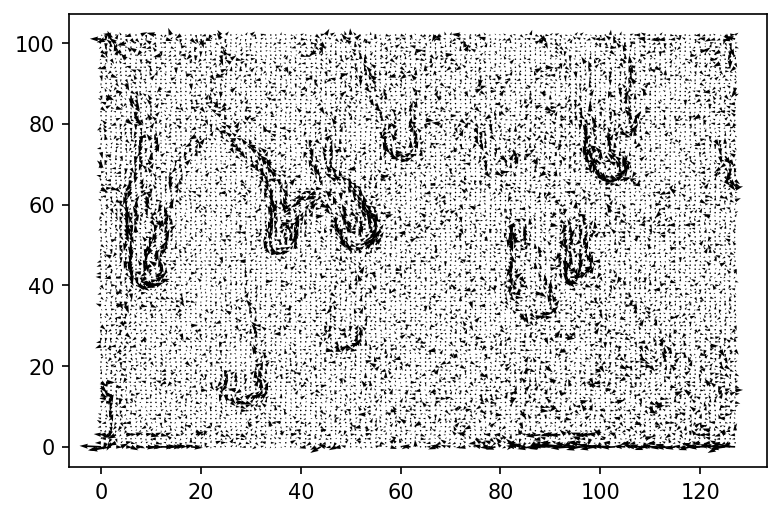

In [47]:
plt.quiver(y[::10,::10],x[::10,::10])

# With Binning

In [38]:
#Binning bitches
x1 = x[::2, ::2] + x[1::2, ::2] + x[::2, 1::2] + x[1::2, 1::2]
x1 = x1/4
print(x[1::2, 1::2].shape)
print(x1.shape)

y1 = y[::2, ::2] + y[1::2, ::2] + y[::2, 1::2] + y[1::2, 1::2]
y1 = y1/4
print(y[1::2, 1::2].shape)
print(y1.shape)

(511, 639)
(511, 639)
(511, 639)
(511, 639)


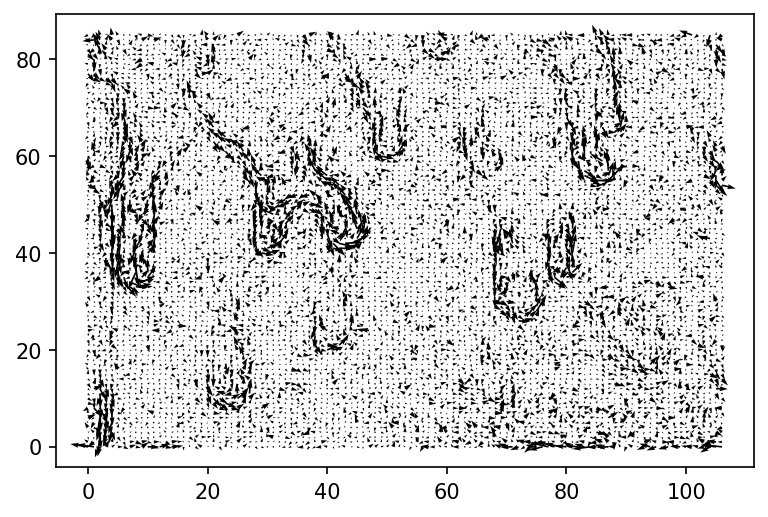

In [46]:
plt.quiver(y1[::6,::6],x1[::6,::6])

In [40]:
x1

array([[  64.70931817,  -95.07511572,   -7.54034972, ...,   44.03307964,
          56.75143842,   -1.00735188],
       [  56.69400426, -142.41460895,   67.42482006, ...,   29.12805795,
          79.11086989,   28.12477506],
       [  58.59296088,  -60.28497475,    5.20054787, ...,   48.57941368,
           1.68787817,   76.32294528],
       ...,
       [ -39.93798026,  -51.01764407,  -33.06139073, ...,   55.04368482,
         -47.164336  ,   87.84279645],
       [  -3.91287767,  -44.66607726,   -7.61528546, ...,   13.06624175,
          -9.14504302,   38.12473194],
       [ -48.33513851,  -15.12248877,   12.53534062, ...,  -92.64011875,
          36.90738658,   23.81753384]])

In [41]:
print(x1[::2, ::2].shape, x1[1::2, ::2].shape, x1[::2, 1::2].shape, x1[1::2, 1::2].shape )
xnew = x1[1::2, ::2]
xnew2 = x1[1::2, 1::2]
xnew3 = x1[::2, 1::2]

xnewnew = np.vstack((xnew, xnew[-1:,:])) 
xnew2new = np.hstack((xnew2,xnew2[:,-1:]))
xnew3new = np.hstack((xnew3,xnew3[:,-1:]))
xnew2new = np.vstack((xnew2new, xnew2new[-1:,:]))

ynew = y1[1::2, ::2]
ynew2 = y1[1::2, 1::2]
ynew3 = y1[::2, 1::2]

ynewnew = np.vstack((ynew, ynew[-1:,:])) 
ynew2new = np.hstack((ynew2,ynew2[:,-1:]))
ynew3new = np.hstack((ynew3,ynew3[:,-1:]))
ynew2new = np.vstack((ynew2new, ynew2new[-1:,:]))

(256, 320) (255, 320) (256, 319) (255, 319)


In [42]:
print(ynewnew.shape, ynew2new.shape, ynew3new.shape)

(256, 320) (256, 320) (256, 320)


In [43]:
x2 = x1[::2, ::2] + xnewnew + xnew2new + xnew3new
x2 = x2/4
print(x1[::2, ::2].shape)
print(x2.shape)

y2 = y1[::2, ::2] + ynewnew + ynew2new + ynew3new
y2 = y2/4
print(y1[::2, ::2].shape)
print(y2.shape)

(256, 320)
(256, 320)
(256, 320)
(256, 320)


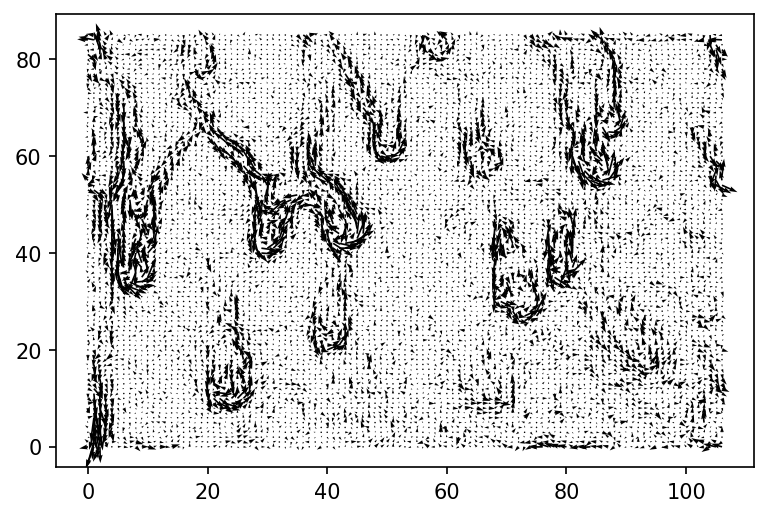

In [53]:
plt.quiver(y2[::3,::3],x2[::3,::3])

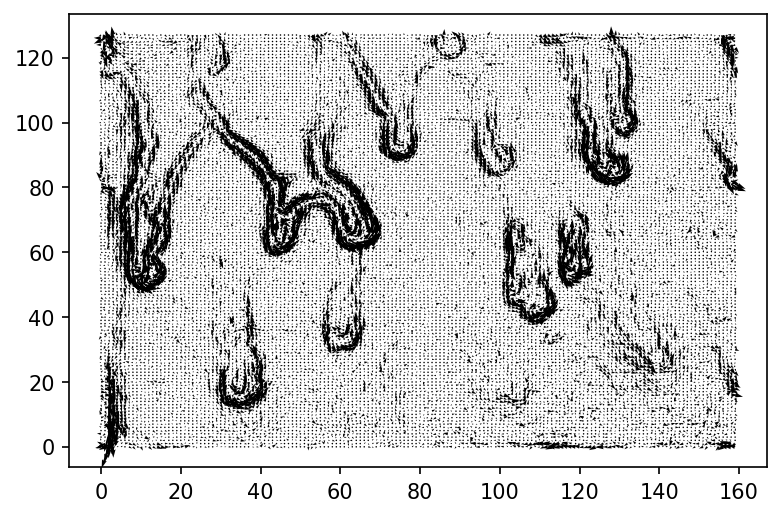

In [52]:
plt.quiver(y2[::2,::2],x2[::2,::2])